[0.16996731711975954, 0.1186342028003479, 0.21256807188565546, 0.07200822998230955]


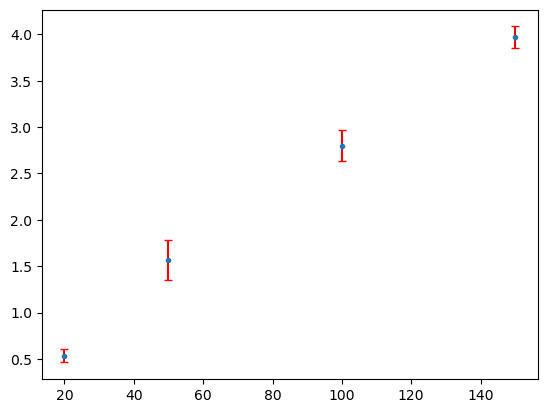

In [71]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Data = np.genfromtxt('første.csv', delimiter=',' , skip_header=1)

Temp = Data[:,3]
Vending = [100 , 150 , 50 , 20]


Gm_temp = []
Usikker = []
for x in range(0,4,1):
    Gm_temp.append(sum(Temp[x*3:x*3+3])/3)
    Usikker.append(np.std((Temp[x*3:x*3+3]))/(np.sqrt(3)))

plt.errorbar(Vending , Gm_temp, Usikker, fmt='.', capsize=3, ecolor='red')
print(Usikker)

0.027951140674186307 para
[0.00103053 0.08294553]
369.3763904441627 varme
12.953080215428816 uwikker
0.8608726506879323


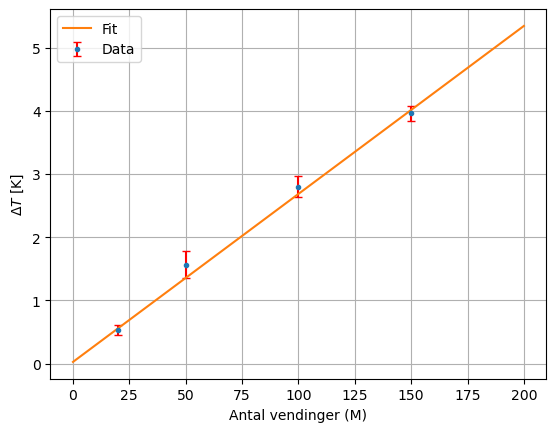

In [121]:
def Lin(x,a,b):
    return a*x+b

Par, Cov = curve_fit(Lin, Vending , Gm_temp , sigma=Usikker , absolute_sigma=True)

Usikker_lin=np.sqrt(np.diagonal(Cov))
xx = np.linspace(0,200,1000)
yy = Lin(xx, *Par)
plt.errorbar(Vending , Gm_temp, Usikker, fmt='.', capsize=3, ecolor='red', label='Data')
plt.plot(xx,yy, label='Fit')
plt.xlabel('Antal vendinger (M)')
plt.ylabel('$\Delta T$ [K]')
plt.grid()
plt.legend()

print(Par[1], 'para')
print(Usikker_lin)
print(9.82/0.02658534831690726 , 'varme')

print(9.82*(Par[1])**(-2) * 0.00103053 , 'uwikker')

# for x in range(len(Gm_temp)):
#     print((9.82*Vending[x]/Gm_temp[x]) , 9.82*Vending[x]*Gm_temp[x]**(-2))
    

chi = []

for x in range(len(Gm_temp)):
    chi.append((Gm_temp[x] - Lin(Vending[x] , *Par))**2/Usikker[x]**2)

Kvadrat= sum(chi) / 2
print(Kvadrat)